<a href="https://colab.research.google.com/github/Devanshusisodiya/ML-PRACTISE/blob/main/MNIST_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
mnist = keras.datasets.mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
#splitting the full data into training and validation also scaling down the pixel values

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

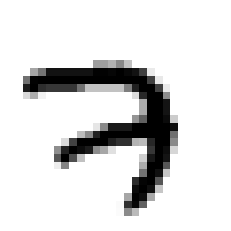

In [7]:
def plot_digit(image):
  plt.imshow(image, cmap=plt.cm.binary)
  plt.axis("off")

plot_digit(X_train[0])

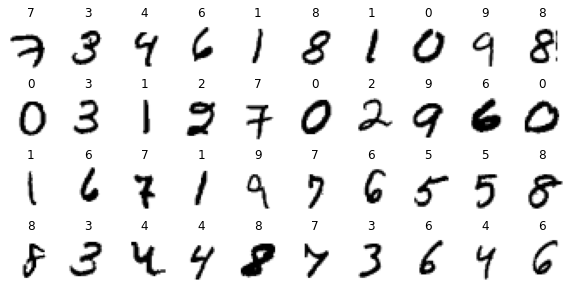

In [8]:
def multiple_digits(dataset, r, c):
  fig, axes = plt.subplots(r, c, figsize=(c,r+1))
  image = 0
  for row in range(r):
    for col in range(c):
      axes[row, col].imshow(dataset[image], cmap=plt.cm.binary)
      axes[row, col].axis("off")
      axes[row, col].set_title(str(y_train[image]))
      image += 1

multiple_digits(X_train, 4, 10)

In [9]:
#custom callback for exponentially increasing learning rate, recording the optimal rates 

K = keras.backend

class ExponentialLR(keras.callbacks.Callback):
  def __init__(self, inc_factor):
    self.inc_factor = inc_factor
    self.rates = []
    self.losses = []
  def on_batch_end(self, batch, logs):
    self.rates.append(K.get_value(self.model.optimizer.lr))
    self.losses.append(logs["loss"])
    K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.inc_factor)


In [10]:
#simple model 
# input -> hidden_1 -> hidden_2 -> output
#it can simply be extended for more rigorous classification 

model =  keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:

#choosing the learning rate to be 0.001 initially

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=keras.metrics.sparse_categorical_accuracy)


In [12]:
exp_lr = ExponentialLR(1.005)

history = model.fit(X_train, y_train,
                    epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[exp_lr]) 

1719/1719 [==============================] - 7s 3ms/step - loss: nan - sparse_categorical_accuracy: 0.5038 - val_loss: nan - val_sparse_categorical_accuracy: 0.0958


Text(0.5, 0, 'Rates')

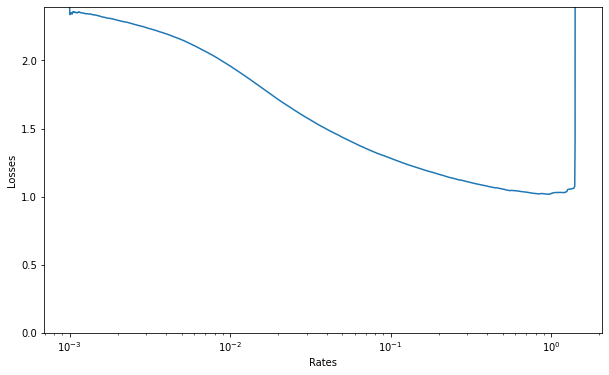

In [25]:

#visualizing learning rates and losses

fig, axes = plt.subplots(figsize=(10,6))
offset = 1460
axes.plot(exp_lr.rates[:offset], exp_lr.losses[:offset])
axes.axis(ymin=0, ymax=exp_lr.losses[0])
axes.set_xscale("log")
axes.set_ylabel("Losses")
axes.set_xlabel("Rates")


#  An estimate of the optimal learning rate can be calculated by the graph
#### I'm going to choose the new learning rate to be **0.4** and observe how the model performs

In [26]:
keras.backend.clear_session()

In [27]:
model =  keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=4e-1),
              metrics=keras.metrics.sparse_categorical_accuracy)

In [29]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4273 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.1503 - val_sparse_categorical_accuracy: 0.9506
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9668 - val_loss: 0.0862 - val_sparse_categorical_accuracy: 0.9756
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0671 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0825 - val_sparse_categorical_accuracy: 0.9774
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0467 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0996 - val_sparse_categorical_accuracy: 0.9712
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0.9870 - val_loss: 0.0861 - val_sparse_categorical_accuracy: 0.9780
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0319 -

In [30]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9741


[0.08172038197517395, 0.9740999937057495]

## An awesome accuracy on the evaluation of the model. Let's see if the performance can be increased.
### This time with the learning rate **0.2**

In [31]:

keras.backend.clear_session()


In [32]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=keras.metrics.sparse_categorical_accuracy)


In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,
                                                  restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb])


Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3912 - sparse_categorical_accuracy: 0.8780 - val_loss: 0.1080 - val_sparse_categorical_accuracy: 0.9676
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0915 - sparse_categorical_accuracy: 0.9714 - val_loss: 0.0938 - val_sparse_categorical_accuracy: 0.9714
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0634 - sparse_categorical_accuracy: 0.9798 - val_loss: 0.0919 - val_sparse_categorical_accuracy: 0.9744
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0432 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0913 - val_sparse_categorical_accuracy: 0.9752
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0309 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.0764 - val_sparse_categorical_accuracy: 0.9794
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0209 -

In [37]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - sparse_categorical_accuracy: 0.9800


[0.07285048812627792, 0.9800000190734863]

## A **1%** increase in the accuracy by decreasing the learning rate from what seemed to be an optimal learning rate which was **0.4** to a sub-optimal rate **0.2**.

## This means that it doesn't necessarily mean that if the loss calculated is higher at some learning rate(**0.2**) is going to perform bad than what seems to be an optimal rate(**0.4**) for training the model. Instead it is observed that it's the other way around.